In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np
import importlib
from os.path import expanduser, join

import task
from task import generate_trials

import train
from train import get_default_hp

from network import Model

import my_rnn_functions as mrnn
importlib.reload(mrnn)

<module 'my_rnn_functions' from '/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/my_rnn_functions.py'>

In [2]:
home = expanduser('~')
saving_path = join(home,'My_scripts_Local/Models_Local/ThalRNN/saved_models/')
model_name = 'test_seed_1'#'first_basic_TC_model_ctx_multi_sensory_delay_relu_seed_1_old'
model_dir=join(saving_path,model_name)


In [3]:
importlib.reload(mrnn)
model_data = mrnn.get_model_data(model_dir)

W0130 08:57:04.362463 4503197120 deprecation.py:506] From /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:828: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0130 08:57:04.367659 4503197120 deprecation.py:323] From /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:834: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.Dense instead.
W0130 08:57:04.370424 4503197120 deprecation.py:323] From /Users/svasquez91/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/layers/core.py:187: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method 


Basic TC weight mask used.



W0130 08:57:06.240709 4503197120 deprecation.py:323] From /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:864: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
W0130 08:57:06.284688 4503197120 deprecation.py:323] From /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:562: Layer.add_variable (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.add_weight` method instead.
W0130 08:57:06.294371 4503197120 deprecation.py:506] From /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:566: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of pas

Variables being optimized:
<tf.Variable 'sen_input/kernel:0' shape=(65, 500) dtype=float32>
<tf.Variable 'sen_input/bias:0' shape=(500,) dtype=float32>
<tf.Variable 'rule_input/kernel:0' shape=(3, 500) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell_separate_input/kernel:0' shape=(500, 500) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell_separate_input/bias:0' shape=(500,) dtype=float32>
<tf.Variable 'output/kernel:0' shape=(500, 33) dtype=float32>
<tf.Variable 'output/bias:0' shape=(33,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/test_seed_1/model.ckpt
Model hp restored.

Basic TC weight mask used.

Variables being optimized:
<tf.Variable 'sen_input/kernel:0' shape=(65, 500) dtype=float32>
<tf.Variable 'sen_input/bias:0' shape=(500,) dtype=float32>
<tf.Variable 'rule_input/kernel:0' shape=(3, 500) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell_separate_input/kernel:0' shape=(500, 500) dtype=float32>
<tf.Variable 'rnn/

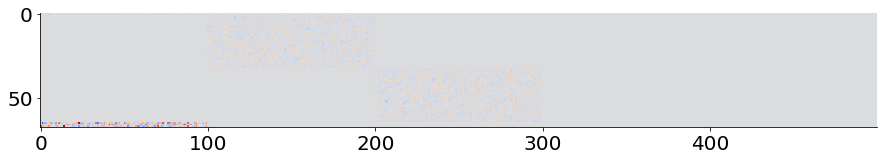

In [4]:
w_type = 'input'
mrnn.plot_weight_matrix(model_data,w_type,abs_weights=False)

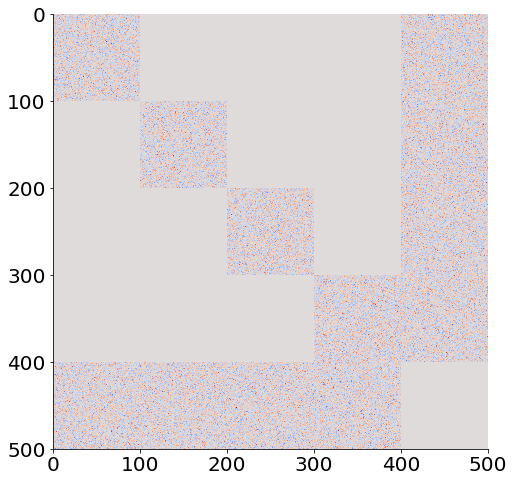

In [5]:
w_type = 'hidden'
mrnn.plot_weight_matrix(model_data,w_type,abs_weights=False)

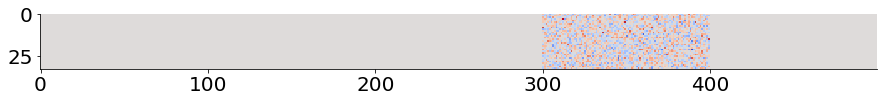

In [6]:
w_type = 'output'
mrnn.plot_weight_matrix(model_data,w_type,abs_weights=False)

/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/first_basic_TC_model_ctx_multi_sensory_delay_relu_seed_1_new
/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/fully_connected_RNN_ctx_multi_sensory_delay_relu_seed_1
/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/sparse_control_RNN_ctx_multi_sensory_delay_relu_seed_1


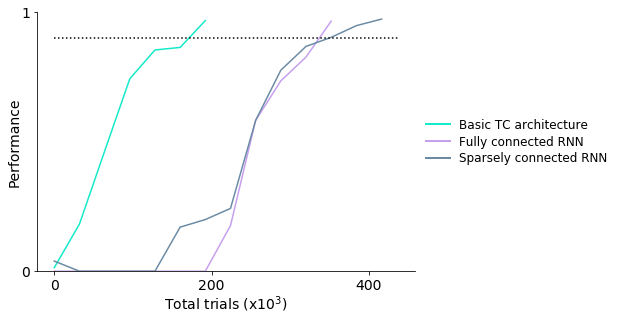

<Figure size 1080x432 with 0 Axes>

In [21]:
importlib.reload(mrnn)

trained_models = ['first_basic_TC_model_ctx_multi_sensory_delay_relu_seed_1_new',
                  'fully_connected_RNN_ctx_multi_sensory_delay_relu_seed_1',
                 'sparse_control_RNN_ctx_multi_sensory_delay_relu_seed_1']

rules = ['multidelaydm'] # ['contextdelaydm1', 'multidelaydm', 'contextdelaydm2'] ['contextdm1', 'multidelaydm', 'contextdm2'] #model_data['hp']['rules']

labels = ['Basic TC architecture','Fully connected RNN', 'Sparsely connected RNN']

mrnn.plt_various_performances(trained_models,models_saving_dir=saving_path,rules=rules, show_legend=True,labels=labels)
